<a href="https://colab.research.google.com/github/ezhil384/ezhil384/blob/main/Coswara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the data repository from the original github source. Alternatively we can download it into our google drive and run the code from there

In [ ]:
!git clone https://github.com/iiscleap/Coswara-Data
%cd Coswara-Data

fatal: destination path 'Coswara-Data' already exists and is not an empty directory.
/content/gdrive/My Drive/Coswara-Data


Reading the combined data file with all the users and their information

In [ ]:
!python extract_data.py

Streaming output truncated to the last 5000 lines.
20200525/yeo7HwJ5Dcbqc4ozwv6az8iRVTJ3/breathing-deep.wav
20200525/yeo7HwJ5Dcbqc4ozwv6az8iRVTJ3/cough-heavy.wav
20200525/yeo7HwJ5Dcbqc4ozwv6az8iRVTJ3/cough-shallow.wav
20210523/
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/counting-fast.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/counting-normal.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/metadata.json
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/vowel-a.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/vowel-o.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/cough-heavy.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/breathing-deep.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/vowel-e.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/breathing-shallow.wav
20210523/vHDrZKBoA4R38Ce3OxkngSUcwPY2/cough-shallow.wav
20210523/FJJZziCGb0bv5h7JlSKaOSXDdOH2/
20210523/FJJZziCGb0bv5h7JlSKaOSXDdOH2/counting-fast.wav
20210523/FJJZziCGb0bv5h7JlSKaOSXDdOH2/counting-normal.wav
20210523/FJJZziCGb0bv5h7JlSKaOSXDdOH2

This cell is if you have loaded the repository on your google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#CSV file for ML
This is a CSV file created having only the audio paths of the coughs and the deep breathing of people along with their covid status as either 0 for healthy or 1 for covid infected.

In [62]:
# import required module
from pathlib import Path
import os
import csv
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Coswara-Data/combined_data.csv')
print(pd.unique(df['covid_status']))

# assign directory
directory = '/content/gdrive/MyDrive/Coswara-Data/'
with open('final.csv','w') as fappend:
  csvwriter=csv.writer(fappend)
  csvwriter.writerow(['relative_path','classID'])
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isdir(f):
      l = os.listdir(f)
      met=os.path.join(f, l[0])
      if os.path.isdir(met)==False:
        print (met)
        with open(met, 'r') as fread,open('final.csv','a') as fappend:
          csvreader = csv.reader(fread)
          csvwriter = csv.writer(fappend)
          new_rows_list = []
          x=0
          for row in csvreader:
            if (x==1):
              aud1 = '/content/gdrive/MyDrive/Coswara-Data/Extracted_data/'+filename+'/'+row[0]+'/cough-heavy.wav'
              aud2 = '/content/gdrive/MyDrive/Coswara-Data/Extracted_data/'+filename+'/'+row[0]+'/breathing-deep.wav'
              if (row[3] in ['healthy','recovered_full','no_resp_illness_exposed']):
                new_rows_list.append([aud1,0])
                new_rows_list.append([aud2,0])
              elif (row[3] in ['positive_mild','positive_asymp','positive_moderate']):
                new_rows_list.append([aud1,1])
                new_rows_list.append([aud2,1])
              csvwriter.writerows(new_rows_list)
            x=1



['healthy' 'no_resp_illness_exposed' 'resp_illness_not_identified'
 'recovered_full' 'positive_mild' 'positive_asymp' 'positive_moderate']
/content/gdrive/MyDrive/Coswara-Data/20200413/20200413.csv
/content/gdrive/MyDrive/Coswara-Data/20200415/20200415.csv
/content/gdrive/MyDrive/Coswara-Data/20200416/20200416.csv
/content/gdrive/MyDrive/Coswara-Data/20200417/20200417.csv
/content/gdrive/MyDrive/Coswara-Data/20200418/20200418.csv
/content/gdrive/MyDrive/Coswara-Data/20200419/20200419.csv
/content/gdrive/MyDrive/Coswara-Data/20200424/20200424.csv
/content/gdrive/MyDrive/Coswara-Data/20200430/20200430.csv
/content/gdrive/MyDrive/Coswara-Data/20200502/20200502.csv
/content/gdrive/MyDrive/Coswara-Data/20200504/20200504.csv
/content/gdrive/MyDrive/Coswara-Data/20200505/20200505.csv
/content/gdrive/MyDrive/Coswara-Data/20200525/20200525.csv
/content/gdrive/MyDrive/Coswara-Data/20200604/20200604.csv
/content/gdrive/MyDrive/Coswara-Data/20200707/20200707.csv
/content/gdrive/MyDrive/Coswara-Dat

This is the first few contents of the csv file for the final deep learning

In [55]:
df = pd.read_csv('final.csv')
df.head()

,Audio,covid_status
0,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0
1,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0
2,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0
3,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0
4,/content/gdrive/MyDrive/Coswara-Data/Extracted...,0


Sample of how to read a csv file with pandas for further work

In [31]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Coswara-Data/20210630/20210630.csv')
df['relative']='/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20210630/'+df['id']+'/cough-heavy.wav'
df=df[['relative','covid_status']]
df.head()

,relative,covid_status
0,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_asymp
1,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_moderate
2,/content/gdrive/MyDrive/Coswara-Data/Extracted...,no_resp_illness_exposed
3,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_mild
4,/content/gdrive/MyDrive/Coswara-Data/Extracted...,positive_moderate


# Librosa 
Plotting the visual image of the wave form of the audio file - helps in running CNN classifiers

In [ ]:
!pip install librosa

48000


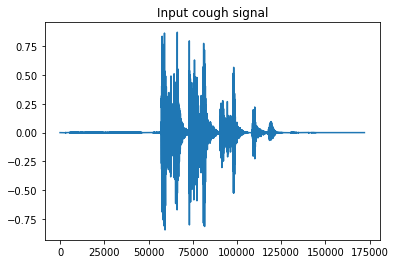

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import sys
#Visualize cough signal
file = "/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20201012/7arBtLdzGeW8oCN0DXhI6dqqUdP2/cough-heavy.wav"
x,sr = librosa.load(file, sr=48000) #to sample all at 48000
plt.plot(x)
plt.title("Input cough signal")
print(fs)

# Audio file
Running an audio file on google colab using wavfile and Audio. Make sure that the file is in .wav format

In [5]:
from IPython.display import Audio
from scipy.io import wavfile
# Load the file on an object
data = wavfile.read('/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20201012/7arBtLdzGeW8oCN0DXhI6dqqUdP2/cough-heavy.wav')

# Separate the object elements
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

#Playing the audio file
Audio(sounddata,rate=framerate)

Sample rate: 48000 Hz
Total time: 3.584 s


or

In [22]:
import IPython.display as ipd
ipd.Audio('/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20201012/7arBtLdzGeW8oCN0DXhI6dqqUdP2/cough-heavy.wav')

Exception ignored in: <function Wave_write.__del__ at 0x7f7699b6c710>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 465, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


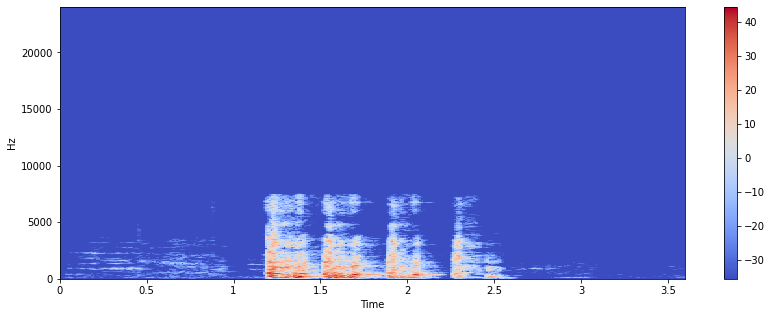

In [19]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 337)


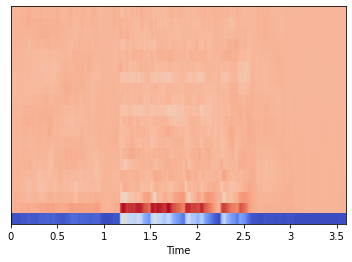

In [23]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

To create a csv file containing all the audios along with their covid status

# For the dataset
Contains all libraries for the audio processing

In [10]:
! pip install torchaudio

     |████████████████████████████████| 1.9MB 8.6MB/s 


In [20]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

class AudioUtil():
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))  

  # Since Resample applies to a single channel, we resample one channel at a time

  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds

  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

    # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)
    
  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

#Dataloader
This function creates the class for loading data using a pytorch implementation

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'relative_path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'classID']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id

In [ ]:
from torch.utils.data import random_split

myds = SoundDS(df, data_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

In [ ]:
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

In [ ]:
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')
  
num_epochs=2   # Just for demo, adjust this higher.
training(myModel, train_dl, num_epochs)

In [ ]:
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]
    
  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

# Run inference on trained model with the validation set
inference(myModel, val_dl)

##GAP

In [65]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

/content/gdrive/MyDrive/Coswara-Data/Extracted_data/20200413/vK2bLRNzllXNeyOMudnNSL5cfpG2/breathing-deep.wav


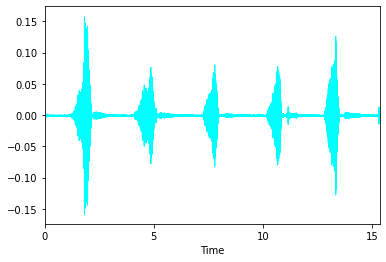

In [68]:
sample_num=3 #pick a file to display
#get the filename 
df = pd.read_csv("final.csv")
filename=df.relative_path[sample_num]
print(filename)
y,sr=librosa.load(filename) #load the file
librosa.display.waveplot(y,sr=sr, x_axis='time', color='cyan')

In [ ]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
  h = array.shape[0]
    w = array.shape[1]
  a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
  b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
  return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')